In [54]:
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload data
data=files.upload()

# Load data
data = pd.read_csv('IEA-EV-dataEV salesHistoricalCars.csv')
data.head()

Saving IEA-EV-dataEV salesHistoricalCars.csv to IEA-EV-dataEV salesHistoricalCars (4).csv


,Region,category,parameter,mode,powertrain,year,unit,value,price
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000,23.0
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039,23.0
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650,23.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000,23.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000,23.0


In [ ]:
# Summary data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Region      3798 non-null   object 
 1   category    3798 non-null   object 
 2   parameter   3798 non-null   object 
 3   mode        3798 non-null   object 
 4   powertrain  3798 non-null   object 
 5   year        3798 non-null   int64  
 6   unit        3798 non-null   object 
 7   value       3798 non-null   float64
 8   price       33 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 267.2+ KB


In [55]:
data.isnull().sum()

,0
Region,0
category,0
parameter,0
mode,0
powertrain,0
year,0
unit,0
value,0
price,3765


In [38]:
#Handling missing values
data.drop(['price'], axis=1, inplace=True)
data.head()

,Region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [56]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
  """
  Performs text preprocessing: tokenization, stopword removal, lemmatization.
  """
  if isinstance(text, str):
    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()] # Remove non-alphabetic tokens and stopwords

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    return " ".join(lemmatized_tokens)
  else:
    return "" # Handle non-string values

corpus = []
# Apply the preprocessing function to the 'parameter' column and create a new column
r = data['parameter'].apply(preprocess_text)

corpus.append(r)

# Display the head of the DataFrame with the new column
print(data.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


      Region    category       parameter  mode powertrain  year      unit  \
0  Australia  Historical        EV sales  Cars        BEV  2011  Vehicles   
1  Australia  Historical  EV stock share  Cars         EV  2011   percent   
2  Australia  Historical  EV sales share  Cars         EV  2011   percent   
3  Australia  Historical        EV stock  Cars        BEV  2011  Vehicles   
4  Australia  Historical        EV stock  Cars        BEV  2012  Vehicles   

       value  price  
0   49.00000   23.0  
1    0.00039   23.0  
2    0.00650   23.0  
3   49.00000   23.0  
4  220.00000   23.0  


<Axes: xlabel='year', ylabel='Count'>

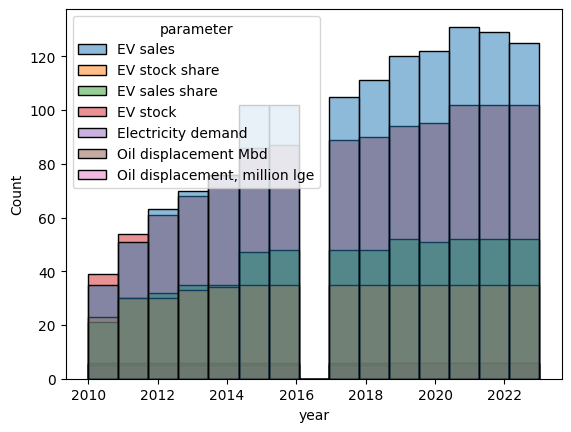

In [57]:
sns.histplot(data=data, x="year", hue="parameter")

<Axes: xlabel='count', ylabel='parameter'>

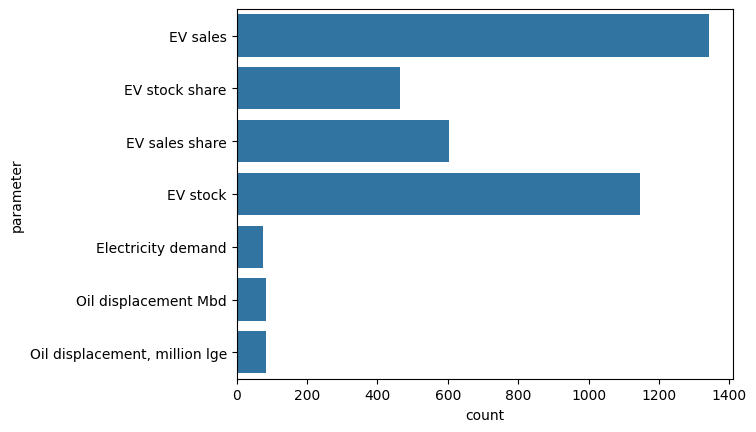

In [58]:
sns.countplot(data=data, y="parameter")


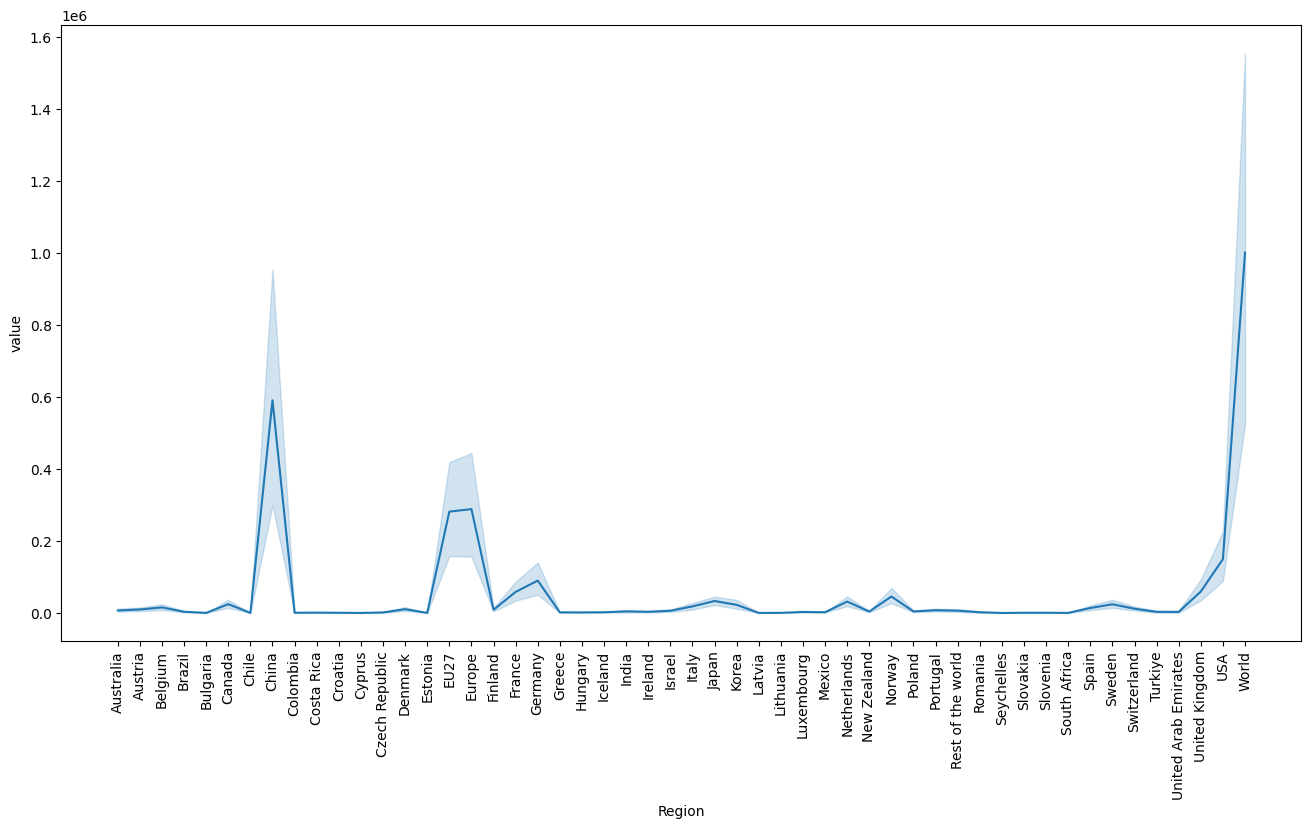

In [41]:
plt.figure(figsize=(16, 8))
figure=sns.lineplot(data=data, x='Region', y='value')
plt.xticks(rotation=90)
plt.show(160, 8)

Training Logistic Regression Model...

--- Logistic Regression Evaluation ---
Accuracy: 0.5705
F1 Score: 0.5265

Confusion Matrix:


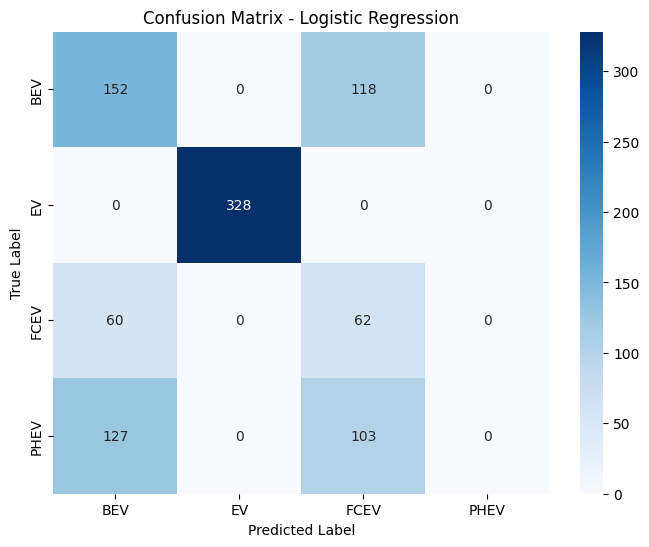


Training Random Forest Classifier Model...

--- Random Forest Classifier Evaluation ---
Accuracy: 0.5442
F1 Score: 0.4927

Confusion Matrix:


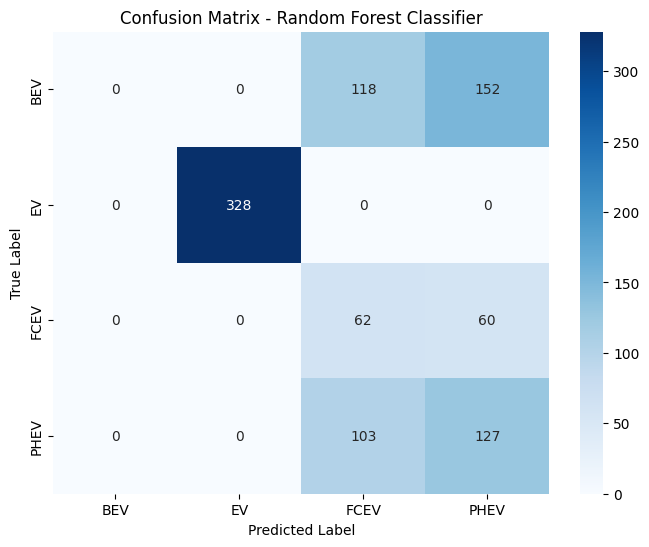


--- Model Comparison ---
Logistic Regression Accuracy: 0.5705
Random Forest Accuracy: 0.5442
Logistic Regression F1 Score (weighted): 0.5265
Random Forest F1 Score (weighted): 0.4927


In [59]:
# Model Implementation


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix



# Using the preprocessed text data 'r' as features
X = r
y = data['powertrain']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Feature Engineering using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Training - Logistic Regression
print("Training Logistic Regression Model...")
log_reg_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train_tfidf, y_train)

# Model Prediction and Evaluation - Logistic Regression
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print("\nConfusion Matrix:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels = log_reg_model.classes_, yticklabels=log_reg_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


# Model Training - Random Forest Classifier
print("\nTraining Random Forest Classifier Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_tfidf, y_train)

# Model Prediction and Evaluation - Random Forest Classifier
y_pred_rf = rf_model.predict(X_test_tfidf)

print("\n--- Random Forest Classifier Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


# Comparison of Results
print("\n--- Model Comparison ---")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Logistic Regression F1 Score (weighted): {f1_score(y_test, y_pred_log_reg, average='weighted'):.4f}")
print(f"Random Forest F1 Score (weighted): {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")

In [60]:
# Demo
def predict_powertrain(text, model, vectorizer):

  preprocessed_text = preprocess_text(text)
  text_tfidf = vectorizer.transform([preprocessed_text])
  prediction = model.predict(text_tfidf)
  return prediction[0]

# Get custom input from the user
custom_input_text = "Ford Mustang Mach-E" #@param {type:"string"}

# Make prediction using the Random Forest model
predicted_powertrain = predict_powertrain(custom_input_text, rf_model, tfidf_vectorizer)

print(f"\n--- Prediction for Custom Input ---")
print(f"Input text: '{custom_input_text}'")
print(f"Predicted Powertrain: {predicted_powertrain}")



--- Prediction for Custom Input ---
Input text: 'Ford Mustang Mach-E'
Predicted Powertrain: EV
